In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

In [2]:
df = pd.read_csv('bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df_copy = df.copy()

In [4]:
cat_cols = df_copy.select_dtypes(include='object')
num_cols = df_copy.select_dtypes(include='number')

In [5]:
df_copy.shape

(4521, 17)

Dataset ini memiliki **4521 baris** dan **17 kolom**

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


- **Kolom numerik** berjumlah 7
- **Kolom objek** berjumlah 10

In [7]:
df_copy.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Tidak ada nilai hilang**

In [8]:
round(num_cols.describe(), 2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


- **Mean**
- **Median**
- **Min**
- **Max**

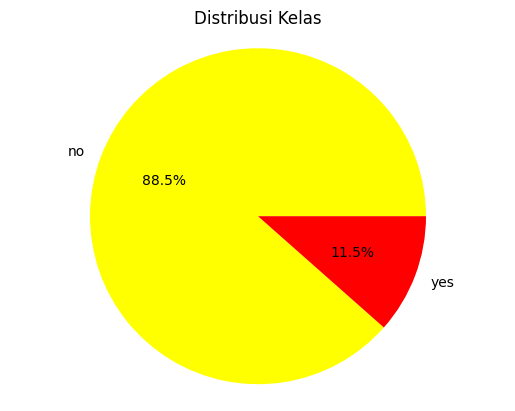

In [9]:
y_count = cat_cols['y'].value_counts()
plt.pie(y_count, labels=y_count.index, autopct='%1.1f%%', colors=['yellow', 'red'])
plt.title('Distribusi Kelas')
plt.axis('equal')
plt.show()

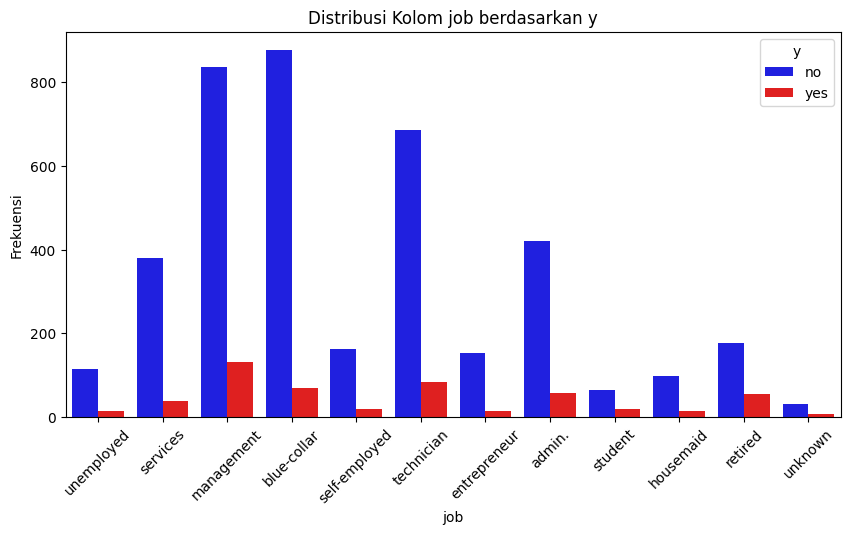

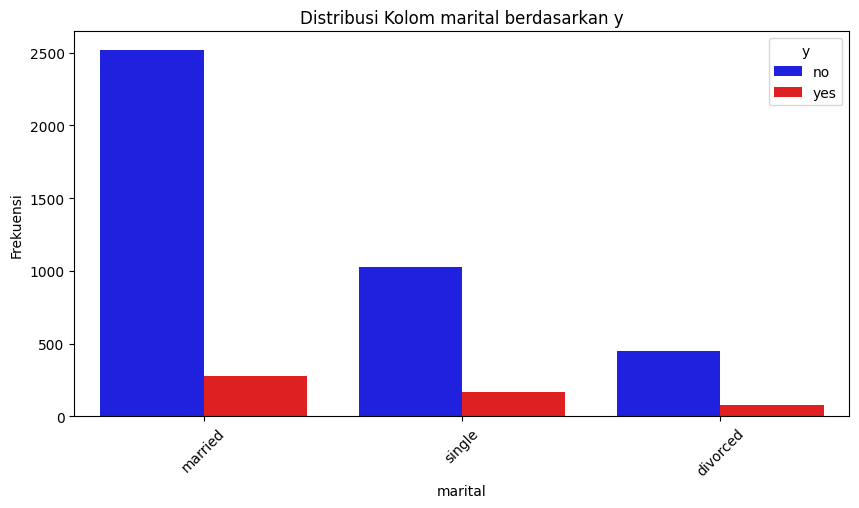

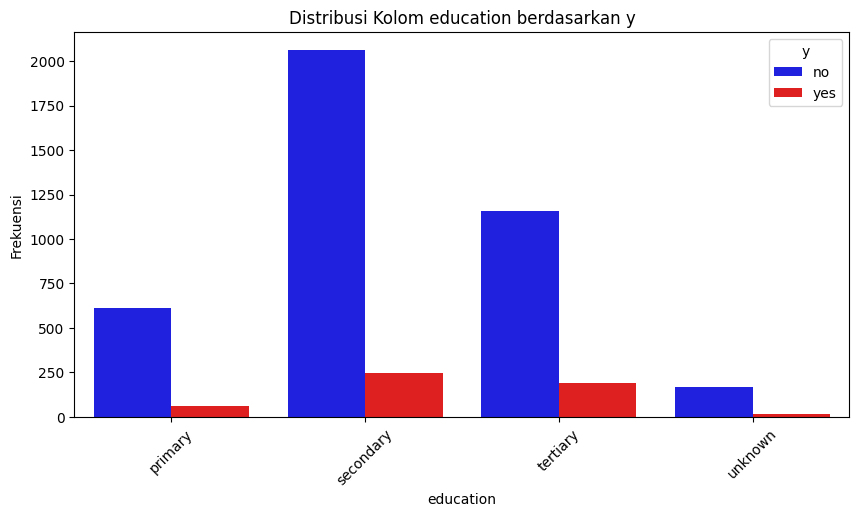

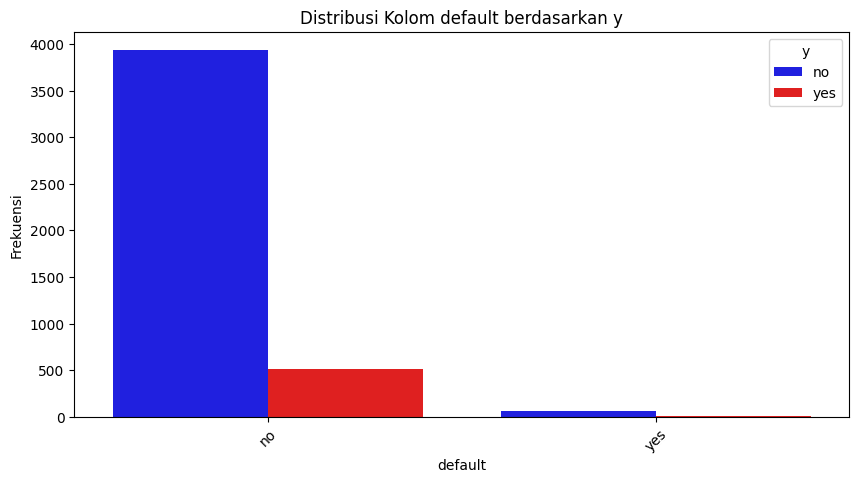

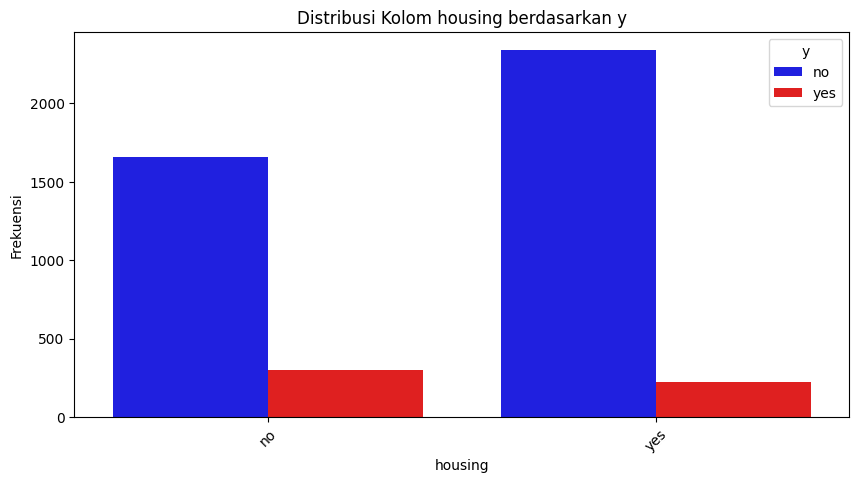

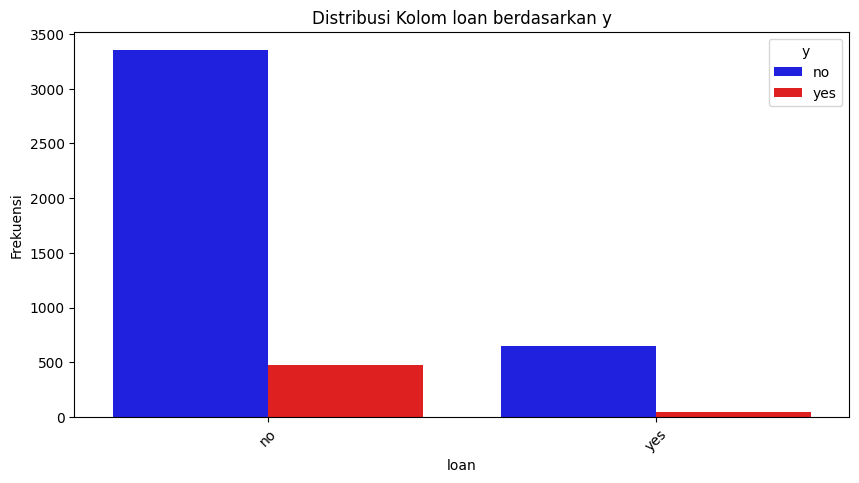

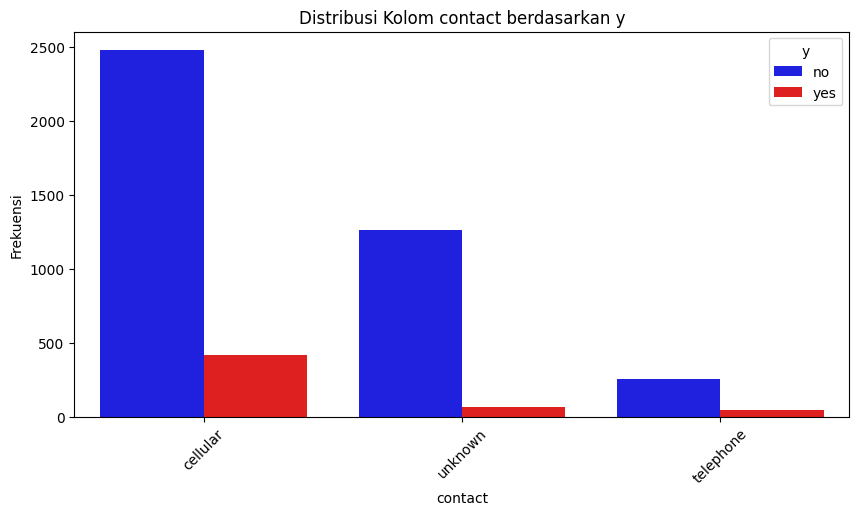

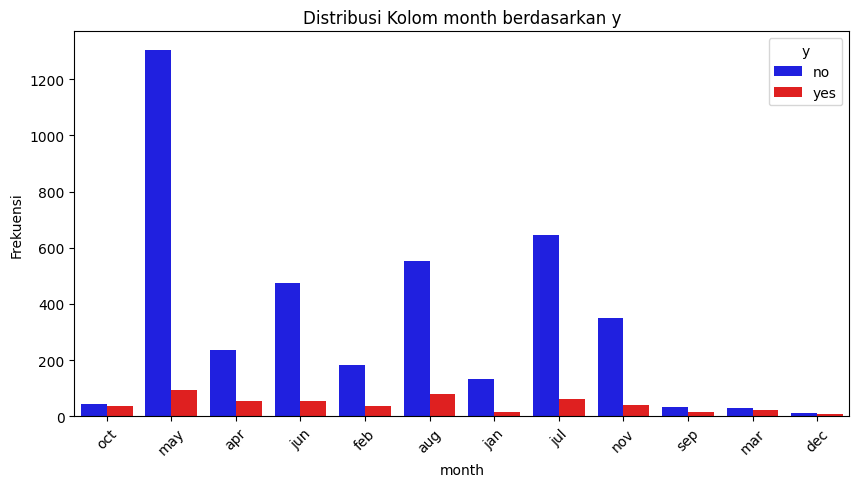

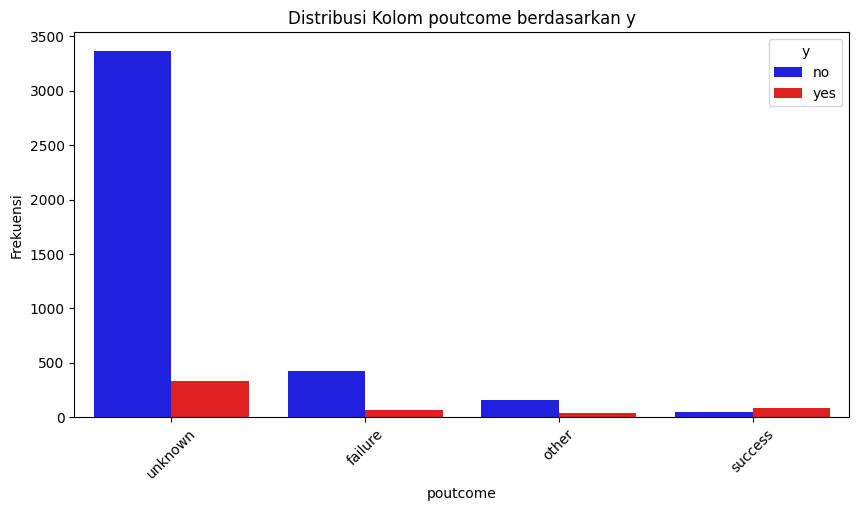

In [10]:
colors = ['blue', 'red']
for col in cat_cols.columns:
    if col != 'y':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_copy, x=col, hue='y', palette=colors)
        plt.title(f'Distribusi Kolom {col} berdasarkan y')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

**Distribusi kelas :**
- **Kelas No** : 88,5%
- **Kelas Yes** : 11,5%

## **Visualisasi Boxplot dan Histogram**

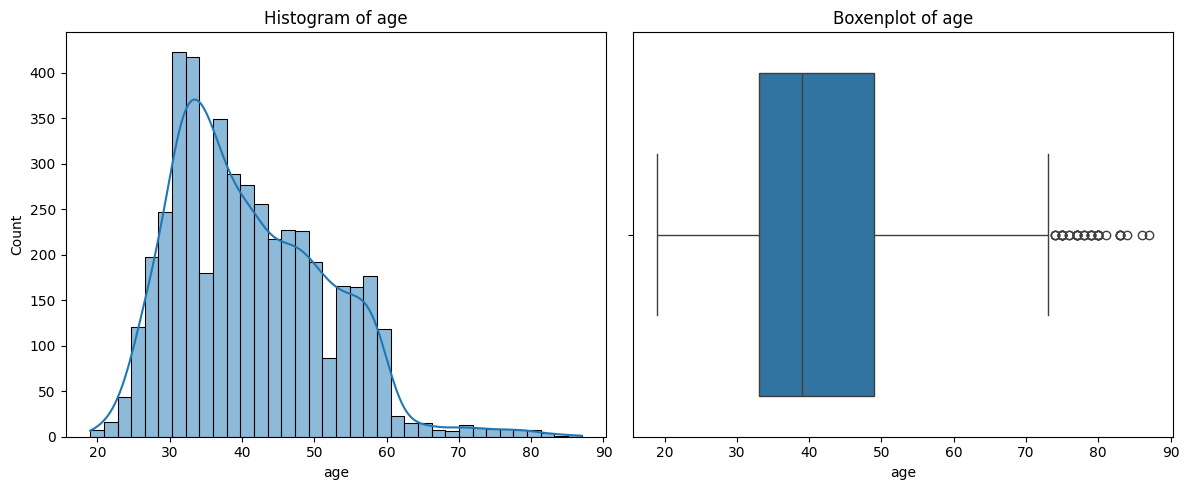

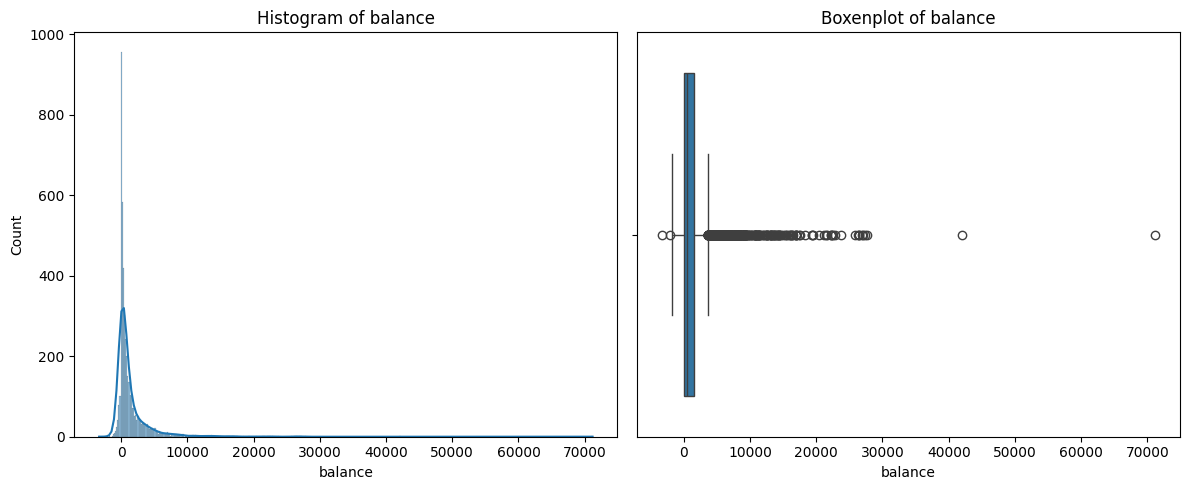

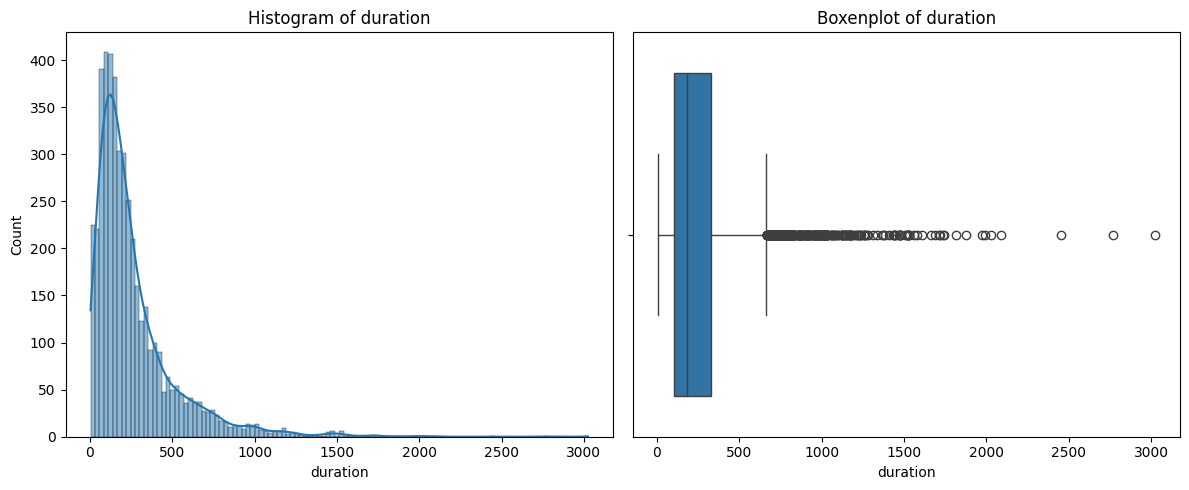

In [11]:
for i in num_cols[['age', 'balance', 'duration']]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram (Distribution Plot)
    sns.histplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxenplot
    sns.boxplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxenplot of {i}')

    plt.tight_layout()
    plt.show()

## **Outlier**

### **Interquartile Range**

In [12]:
outlier_counts = {}
for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    outliers = num_cols[(num_cols[col] < lwr) | (num_cols[col] > upr)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

{'age': 38,
 'balance': 506,
 'day': 0,
 'duration': 330,
 'campaign': 318,
 'pdays': 816,
 'previous': 816}

In [13]:
q1 = num_cols['balance'].quantile(0.25)
q3 = num_cols['balance'].quantile(0.75)
iqr = q3 - q1
lwr = q1 - 1.5 * iqr
upr = q3 + 1.5 * iqr
outliers = num_cols[(num_cols['balance'] < lwr) | (num_cols['balance'] > upr)]
outliers

,age,balance,day,duration,campaign,pdays,previous
1,33,4789,11,220,1,339,4
10,39,9374,20,273,1,-1,0
16,56,4073,27,239,5,-1,0
25,41,5883,20,182,2,-1,0
30,68,4189,14,897,2,-1,0
...,...,...,...,...,...,...,...
4464,53,4554,5,8,6,-1,0
4473,33,4790,20,137,1,272,2
4489,45,6945,5,131,5,356,3
4500,38,4196,12,193,2,-1,0


In [14]:
minus_outliers = num_cols[num_cols['balance'] < 0]
minus_outliers['balance']

9        -88
18      -221
48      -849
60      -516
92      -195
        ... 
4474    -237
4502     -91
4506    -166
4516    -333
4517   -3313
Name: balance, Length: 366, dtype: int64

### **Z-Score**

In [15]:
means = num_cols.mean()
stds = num_cols.std()

z_scores_manual = (num_cols - means) / stds

threshold = 3

outlier_counts_manual = {}
for col in num_cols.columns:
    outlier_counts_manual[col] = (z_scores_manual[col].abs() > threshold).sum()

outlier_counts_manual

{'age': np.int64(44),
 'balance': np.int64(88),
 'day': np.int64(0),
 'duration': np.int64(88),
 'campaign': np.int64(87),
 'pdays': np.int64(171),
 'previous': np.int64(99)}

## **Heatmap**

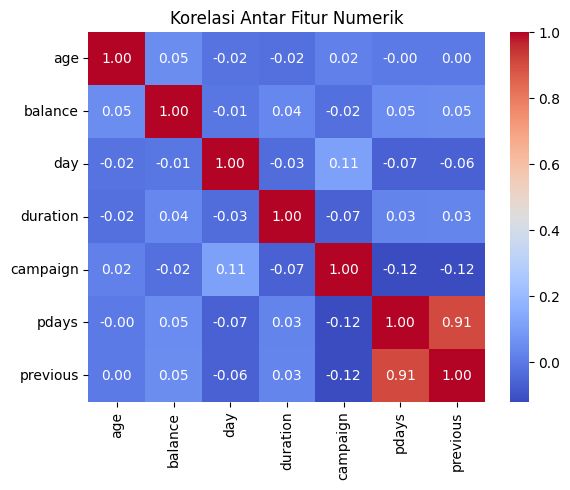

In [16]:
sns.heatmap(num_cols.corr('kendall'), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

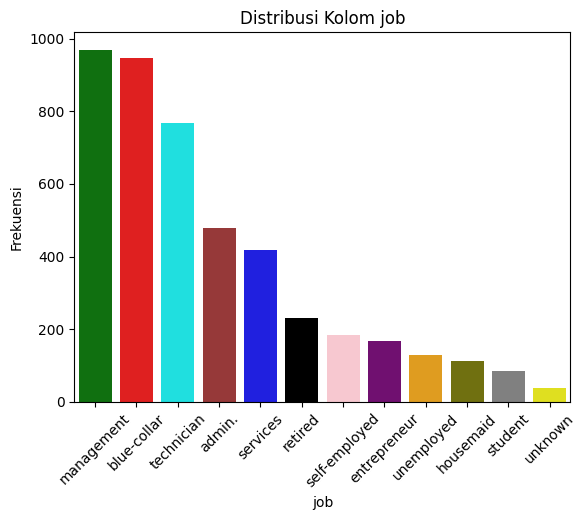

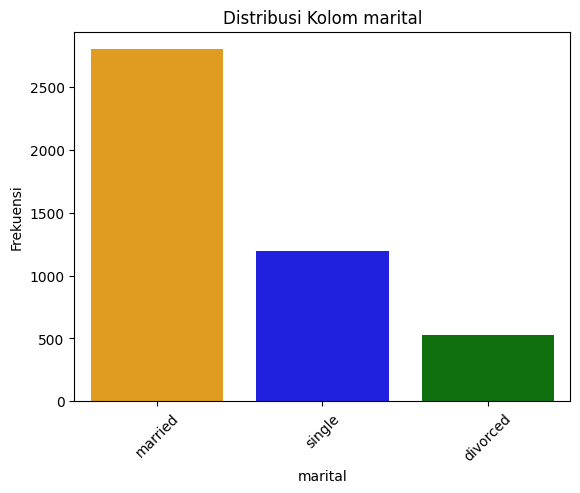

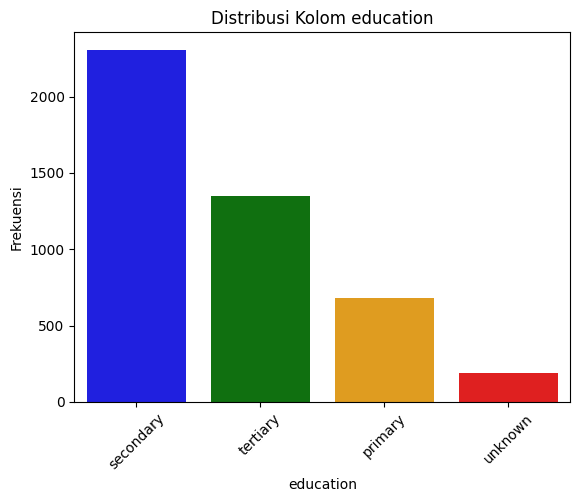

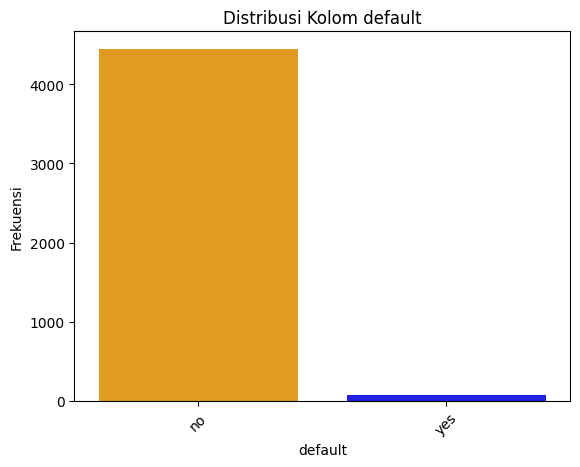

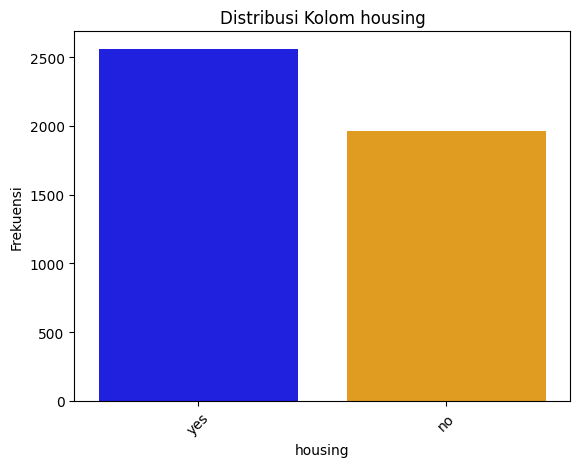

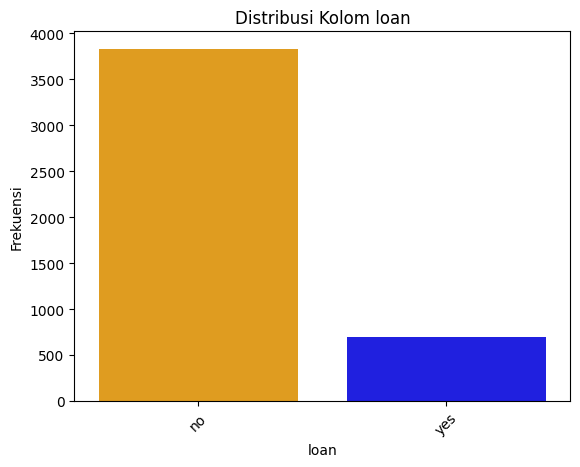

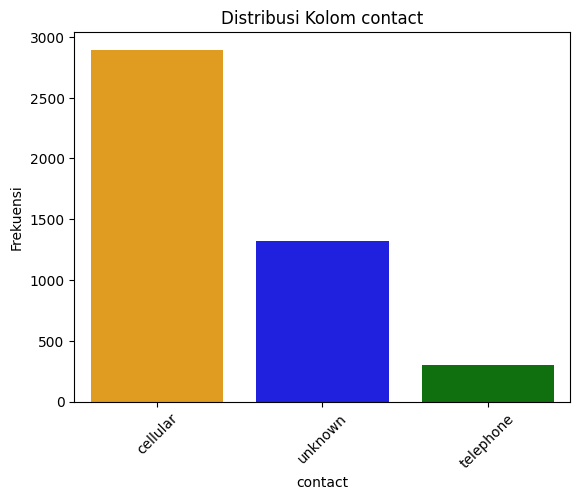

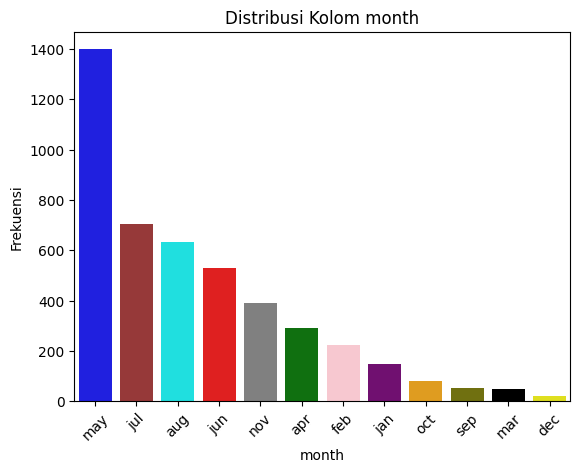

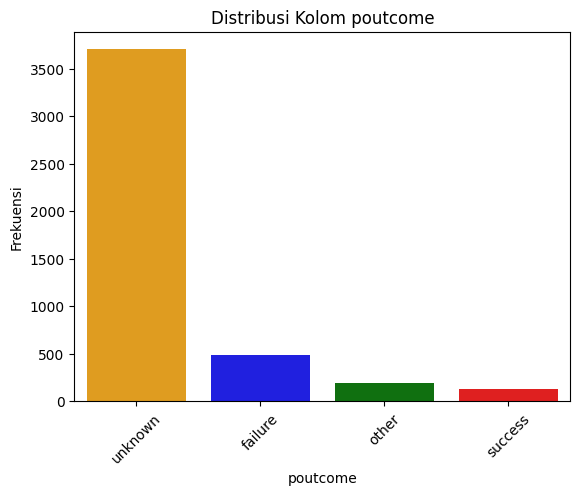

In [17]:
colors = ['orange', 'blue', 'green', 'red', 'pink', 'cyan', 'purple', 'brown', 'gray', 'olive', 'black', 'yellow']
for col in cat_cols.columns:
    if col != 'y':
        unique_values = cat_cols[col].nunique()
        palette = colors[:unique_values]
        sns.countplot(data=cat_cols, x=col, hue=col, order=cat_cols[col].value_counts().index, palette=palette, legend=False)  
        plt.title(f'Distribusi Kolom {col}')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

**Insights:** 

1. Data sangat beragam namun **kekurangan kejelasan** karena nama kolom yang tidak jelas (poutcome, previous, pdays).
2. Beberapa kolom memiliki **value unknown**, beberapa kami anggap sebagai **error dari pengisi data**. Namun, terdeteksi manipulasi data yang membuat data sangat **tidak seimbang** dan **tidak masuk akal**.
3. Beberapa kolom numerik memiliki **minus**. Untuk beberapa kolom kami menganggapnya sebagai **error dari pengisi data**. Namun untuk **balance** kami buat **pengecualian** atas dasar bahwa balance seseorang di bank bisa **menyentuh angka minus**.

# **Preprocessing Data**

**Menghapus Outlier**

In [18]:
for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    num_cols[col] = num_cols[col].apply(lambda x: np.nan if x < lwr or x > upr else x)

In [19]:
num_cols.dropna(inplace=True)

<Axes: >

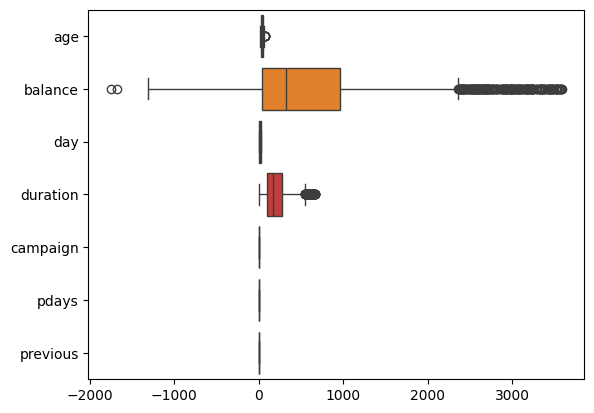

In [20]:
sns.boxplot(num_cols, orient='h')

**Mengganti outlier dengan batas bawah dan batas atas**

In [21]:
for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    num_cols[col] = num_cols[col].apply(lambda x: lwr if x < lwr else (upr if x > upr else x))

<Axes: >

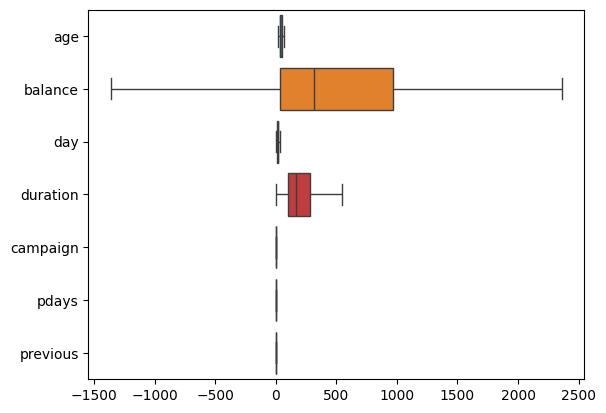

In [22]:
sns.boxplot(num_cols, orient='h')

**Persebaran Data Ulang kolom Education, Job, Contact, Poutcome**

In [23]:
education_mode = cat_cols['education'].mode()[0]
cat_cols['education'] = cat_cols['education'].replace('unknown', education_mode)

job_mode = cat_cols['job'].mode()[0]
cat_cols['job'] = cat_cols['job'].replace('unknown', job_mode)

In [24]:
cat_cols['contact'] = cat_cols['contact'].replace('unknown', 'telephone')

In [25]:
unknown_indices = cat_cols[cat_cols['poutcome'] == 'unknown'].index

num_unknown = len(unknown_indices)
num_other = num_unknown // 3
num_success = num_unknown // 3
num_failure = num_unknown - num_other - num_success

cat_cols.loc[unknown_indices[:num_other], 'poutcome'] = 'other'
cat_cols.loc[unknown_indices[num_other:num_other + num_success], 'poutcome'] = 'success'
cat_cols.loc[unknown_indices[num_other + num_success:], 'poutcome'] = 'failure'

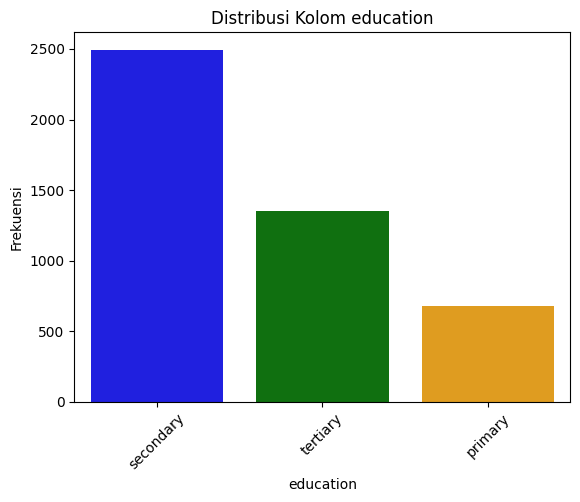

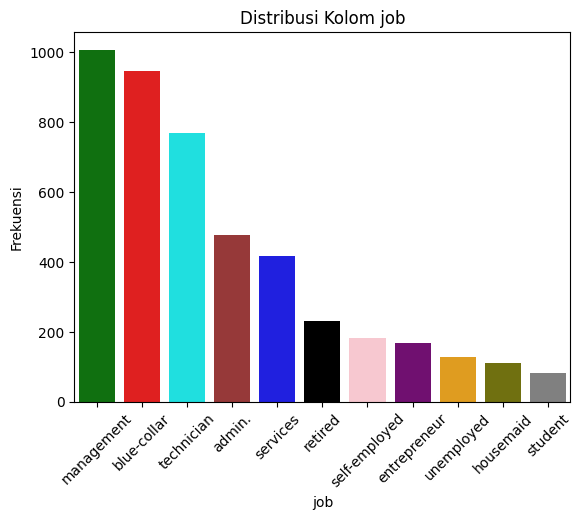

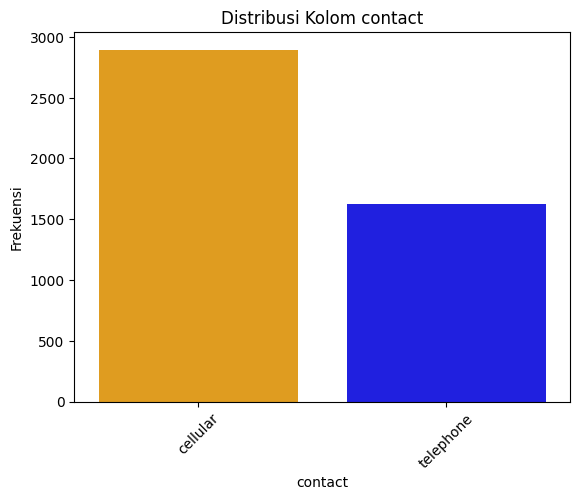

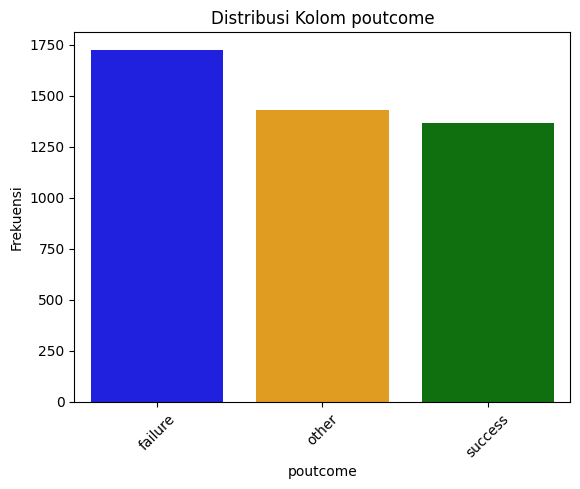

In [26]:
colors = ['orange', 'blue', 'green', 'red', 'pink', 'cyan', 'purple', 'brown', 'gray', 'olive', 'black', 'yellow']
for col in cat_cols[['education', 'job', 'contact', 'poutcome']]:
    unique_values = cat_cols[col].nunique()
    palette = colors[:unique_values]
    sns.countplot(data=cat_cols, x=col, hue=col, order=cat_cols[col].value_counts().index, palette=palette, legend=False)  
    plt.title(f'Distribusi Kolom {col}')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

**Mapping**

In [27]:
for col in cat_cols.columns:
    unique_values = cat_cols[col].unique()
    print(f'{col}: {unique_values}')

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['other' 'failure' 'success']
y: ['no' 'yes']


In [28]:
mapping_biner = {
    'no': 0,
    'yes': 1
}
for col in cat_cols[['default', 'housing', 'loan', 'y']]:
    cat_cols[col] = cat_cols[col].map(mapping_biner)

In [29]:
mappings_month = (
    {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
)
cat_cols['month'] = cat_cols['month'].map(mappings_month)

In [30]:
mapping_job = {
    'unemployed': 0, 
    'services': 1, 
    'management': 2, 
    'blue-collar': 3, 
    'self-employed': 4,
    'technician': 5,
    'entrepreneur': 6, 
    'admin.': 7, 
    'student': 8, 
    'housemaid': 9, 
    'retired': 10
}
cat_cols['job'] = cat_cols['job'].map(mapping_job)

In [31]:
mappings_marital = {
    'single': 1,
    'married': 2,
    'divorced': 0
}
cat_cols['marital'] = cat_cols['marital'].map(mappings_marital)

In [32]:
mapping_education = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}
cat_cols['education'] = cat_cols['education'].map(mapping_education)

In [33]:
mapping_poutcome = {
    'failure': 0,
    'other': 1,
    'success': 2
}
cat_cols['poutcome'] = cat_cols['poutcome'].map(mapping_poutcome)

In [34]:
mapping_contact = {
    'cellular': 1,
    'telephone': 0
}
cat_cols['contact'] = cat_cols['contact'].map(mapping_contact)

In [35]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,0,2,0,0,0,0,1,10,1,0
1,1,2,1,0,1,1,1,5,0,0
2,2,1,2,0,1,0,1,4,0,0
3,2,2,2,0,1,1,0,6,1,0
4,3,2,1,0,1,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...
4516,1,2,1,0,1,0,1,7,0,0
4517,4,2,2,1,1,1,0,5,0,0
4518,5,2,1,0,0,0,1,8,0,0
4519,3,2,1,0,0,0,1,2,1,0


In [36]:
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,30.0,1787.0,19,79.0,1.0,-1.0,0.0
3,30.0,1476.0,3,199.0,4.0,-1.0,0.0
4,59.0,0.0,5,226.0,1.0,-1.0,0.0
7,39.0,147.0,6,151.0,2.0,-1.0,0.0
8,41.0,221.0,14,57.0,2.0,-1.0,0.0
...,...,...,...,...,...,...,...
4510,36.0,566.0,20,129.0,2.0,-1.0,0.0
4512,40.0,1100.0,29,548.5,2.0,-1.0,0.0
4513,49.0,322.0,14,356.0,2.0,-1.0,0.0
4515,32.0,473.0,7,548.5,5.0,-1.0,0.0


In [37]:
df_copy[num_cols.columns] = num_cols
df_copy[cat_cols.columns] = cat_cols
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,0,2,0,0,1787.0,0,0,1,19.0,10,79.0,1.0,-1.0,0.0,1,0
1,NaN,1,2,1,0,NaN,1,1,1,NaN,5,NaN,NaN,NaN,NaN,0,0
2,NaN,2,1,2,0,NaN,1,0,1,NaN,4,NaN,NaN,NaN,NaN,0,0
3,30.0,2,2,2,0,1476.0,1,1,0,3.0,6,199.0,4.0,-1.0,0.0,1,0
4,59.0,3,2,1,0,0.0,1,0,0,5.0,5,226.0,1.0,-1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,1,2,1,0,-333.0,1,0,1,30.0,7,329.0,5.0,-1.0,0.0,0,0
4517,NaN,4,2,2,1,NaN,1,1,0,NaN,5,NaN,NaN,NaN,NaN,0,0
4518,NaN,5,2,1,0,NaN,0,0,1,NaN,8,NaN,NaN,NaN,NaN,0,0
4519,NaN,3,2,1,0,NaN,0,0,1,NaN,2,NaN,NaN,NaN,NaN,1,0


In [38]:
df_copy.dropna(inplace=True)

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2803 entries, 0 to 4516
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2803 non-null   float64
 1   job        2803 non-null   int64  
 2   marital    2803 non-null   int64  
 3   education  2803 non-null   int64  
 4   default    2803 non-null   int64  
 5   balance    2803 non-null   float64
 6   housing    2803 non-null   int64  
 7   loan       2803 non-null   int64  
 8   contact    2803 non-null   int64  
 9   day        2803 non-null   float64
 10  month      2803 non-null   int64  
 11  duration   2803 non-null   float64
 12  campaign   2803 non-null   float64
 13  pdays      2803 non-null   float64
 14  previous   2803 non-null   float64
 15  poutcome   2803 non-null   int64  
 16  y          2803 non-null   int64  
dtypes: float64(7), int64(10)
memory usage: 394.2 KB


# Membuat fitur baru (Feature engineering & selection)

In [40]:
df_copy['total_duration'] = df_copy['duration'] * df_copy['campaign']
df_copy['family_stability'] = (df_copy['marital'] + df_copy['housing'] - df_copy['loan'] - df_copy['default'])
df_copy['ease_of_contact'] = df_copy['contact'] + df_copy['education'] - df_copy['housing']

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2803 entries, 0 to 4516
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2803 non-null   float64
 1   job               2803 non-null   int64  
 2   marital           2803 non-null   int64  
 3   education         2803 non-null   int64  
 4   default           2803 non-null   int64  
 5   balance           2803 non-null   float64
 6   housing           2803 non-null   int64  
 7   loan              2803 non-null   int64  
 8   contact           2803 non-null   int64  
 9   day               2803 non-null   float64
 10  month             2803 non-null   int64  
 11  duration          2803 non-null   float64
 12  campaign          2803 non-null   float64
 13  pdays             2803 non-null   float64
 14  previous          2803 non-null   float64
 15  poutcome          2803 non-null   int64  
 16  y                 2803 non-null   int64  
 17  

<Axes: >

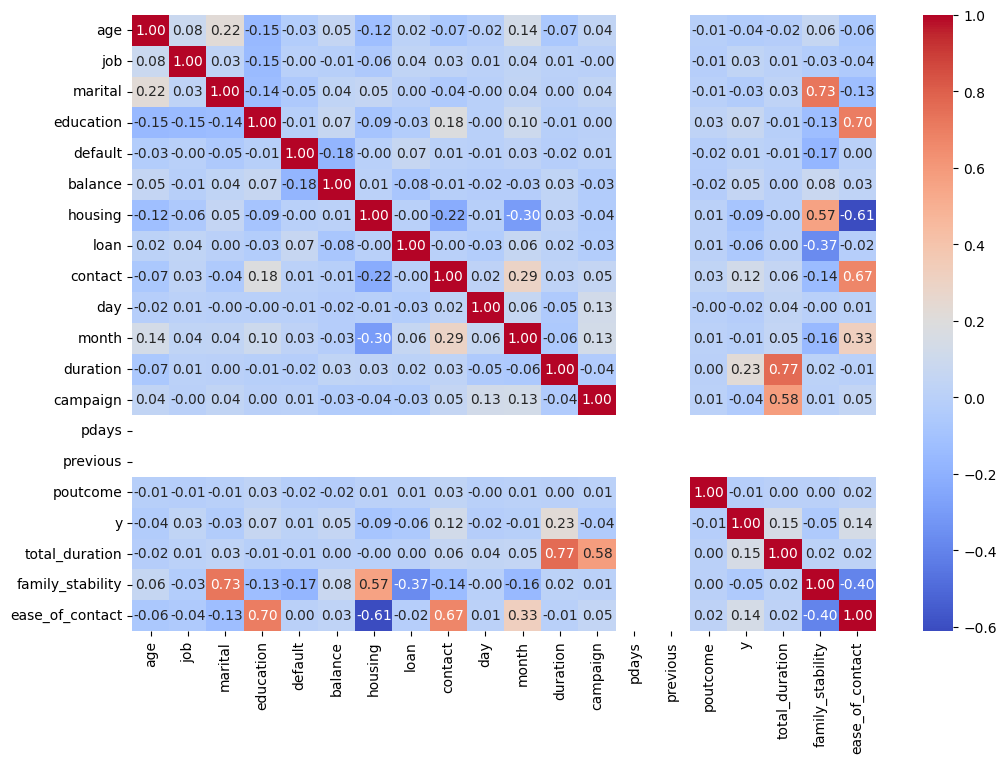

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr('spearman'), annot=True, fmt='.2f', cmap='coolwarm')

In [43]:
df_copy.drop(columns=['age','job','default','education','poutcome','day','month','pdays', 'previous', 'marital'],inplace=True)

<Axes: >

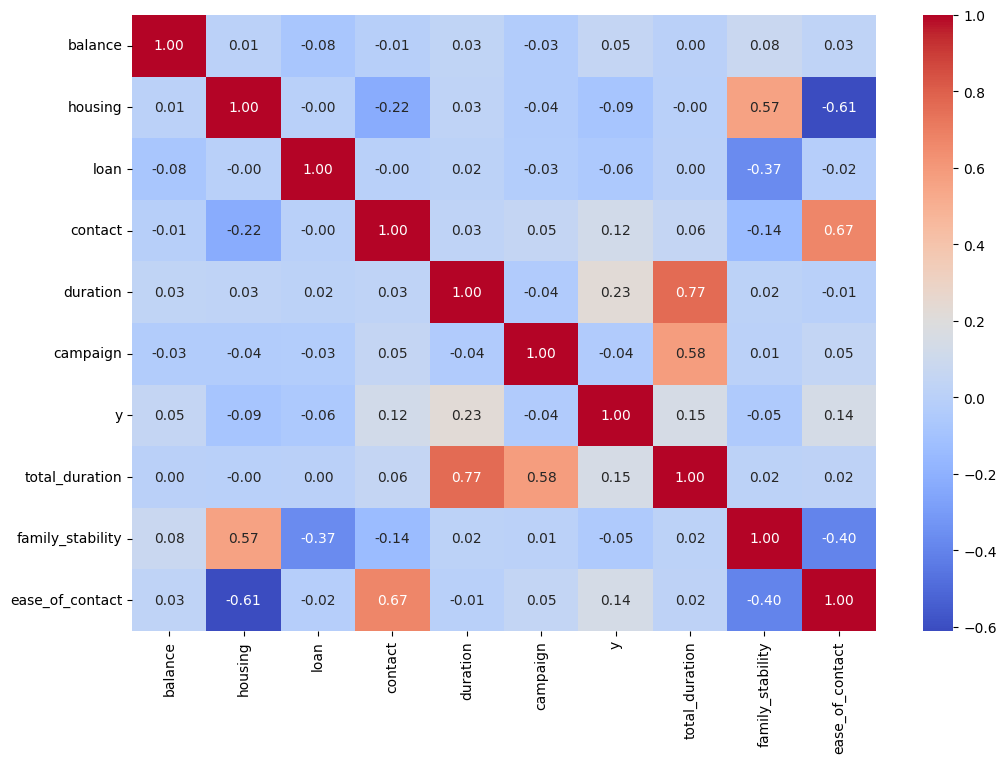

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr('spearman'), annot=True, fmt='.2f', cmap='coolwarm')

**Membagi data**

In [45]:
x = df_copy.drop(columns='y')
y = df_copy['y']

**Membagi data training dan testing**

In [46]:
def train_test_split_manual(x, y, test_size=0.2, random_state=42, stratify=None):
    np.random.seed(random_state)
    
    if stratify is not None:
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        train_indices = []
        test_indices = []
        
        for class_index in range(len(unique_classes)):
            class_member_indices = np.where(y_indices == class_index)[0]
            np.random.shuffle(class_member_indices)
            
            n_test_samples = int(len(class_member_indices) * test_size)
            test_indices.extend(class_member_indices[:n_test_samples])
            train_indices.extend(class_member_indices[n_test_samples:])
        
        train_indices = np.array(train_indices)
        test_indices = np.array(test_indices)
    else:
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        
        n_test_samples = int(len(y) * test_size)
        test_indices = indices[:n_test_samples]
        train_indices = indices[n_test_samples:]
    
    x_train = x.iloc[train_indices]
    x_test = x.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_manual(x, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2243, 9)
X_test shape: (560, 9)
y_train shape: (2243,)
y_test shape: (560,)


# **Modelling**

**Normalisasi fitur**

In [47]:
def min_max_scale(train, test):
    min_vals = train.min(axis=0)
    max_vals = train.max(axis=0)
    range_val = max_vals - min_vals
    range_val[range_val == 0] = 1
    
    train_scaled = (train - min_vals) / range_val
    test_scaled = (test - min_vals) / range_val
    
    return train_scaled, test_scaled

x_train_scaled, x_test_scaled = min_max_scale(x_train.values, x_test.values)

**Oversampling data training**

In [48]:
def smote(x, y, random_state=42, k=5):
    np.random.seed(random_state)
    
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_samples = x[class_indices]
            
            n_samples_to_generate = max_class_count - class_counts[class_label]
            
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                
                distances = np.linalg.norm(class_samples - sample, axis=1)
                nearest_neighbors = np.argsort(distances)[1:k+1]
                
                neighbor_index = np.random.choice(nearest_neighbors)
                neighbor = class_samples[neighbor_index]
                
                diff = neighbor - sample
                synthetic_sample = sample + np.random.rand() * diff
                
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)
    
    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = smote(x_train_scaled, y_train.values)

**Elbow Method**

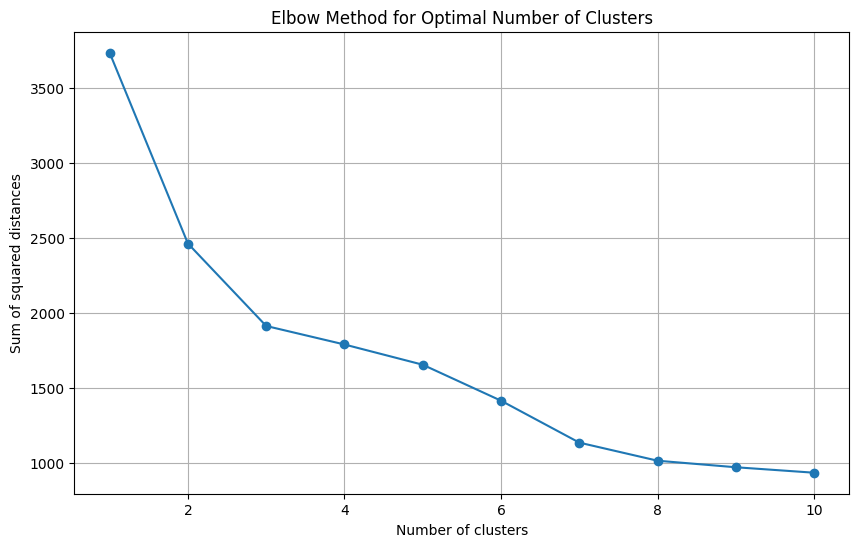

In [49]:
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(centroids.shape[0]):
        inertia += np.sum((X[labels == i] - centroids[i]) ** 2)
    return inertia

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    inertia = compute_inertia(X, labels, centroids)
    return centroids, labels, inertia

# Example usage
sse = []
for k in range(1, 11):
    _, _, inertia = kmeans(x_train_resampled, k)
    sse.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

## **KNearest Neighbour**

In [50]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

knn = KNN(k=7)
knn.fit(x_train_resampled, y_train_resampled)
y_pred_knn_custom = knn.predict(x_test_scaled)

accuracy_custom = np.mean(y_pred_knn_custom == y_test)
print(f'Custom KNN Accuracy: {accuracy_custom:.2f}')

Custom KNN Accuracy: 0.81


In [51]:
def classification_report_manual(y_true, y_pred):
    tp = fp = tn = fn = 0

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    support_pos = tp + fn
    support_neg = tn + fp

    print(f"{'Class':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
    print(f"{'0':<10}{tn / (tn + fn):<10.2f}{tn / (tn + fp):<10.2f}{2 * (tn / (tn + fn) * tn / (tn + fp)) / (tn / (tn + fn) + tn / (tn + fp)):<10.2f}{support_neg:<10}")
    print(f"{'1':<10}{precision:<10.2f}{recall:<10.2f}{f1_score:<10.2f}{support_pos:<10}")

classification_report_manual(y_test, y_pred_knn_custom)

Class     Precision Recall    F1-Score  Support   
0         0.97      0.83      0.89      527       
1         0.16      0.55      0.25      33        


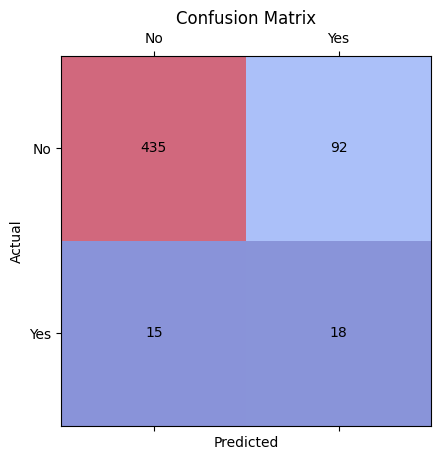

In [52]:
def plot_confusion_matrix(y_true, y_pred):
    tp = fp = tn = fn = 0

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1

    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap='coolwarm', alpha=0.6)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn_custom)

## **Logistic Regression**

In [53]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

log_reg_manual = LogisticRegressionManual(learning_rate=0.01, n_iterations=1000)
log_reg_manual.fit(x_train_resampled, y_train_resampled)

y_pred_log_reg_manual = log_reg_manual.predict(x_test_scaled)

accuracy_log_reg_manual = np.mean(y_pred_log_reg_manual == y_test)
print(f'Logistic Regression Manual Accuracy: {accuracy_log_reg_manual:.2f}')

Logistic Regression Manual Accuracy: 0.61


In [54]:
print('Logistic Regression Manual Classification Report:')
print(classification_report_manual(y_test, y_pred_log_reg_manual))

Logistic Regression Manual Classification Report:
Class     Precision Recall    F1-Score  Support   
0         0.97      0.60      0.74      527       
1         0.10      0.70      0.17      33        
None


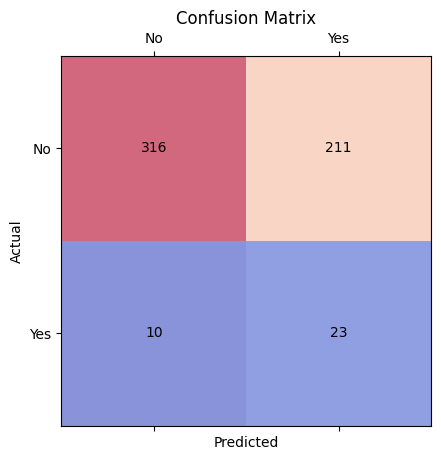

In [55]:
plot_confusion_matrix(y_test, y_pred_log_reg_manual)

## **Decision Tree**

In [56]:
class DecisionTreeManual:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return None

        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {'predicted_class': predicted_class}

        if len(set(y)) == 1:
            return node

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return node

        indices_left = X[:, best_feature] < best_threshold
        X_left, y_left = X[indices_left], y[indices_left]
        X_right, y_right = X[~indices_left], y[~indices_left]

        node['feature'] = best_feature
        node['threshold'] = best_threshold
        node['left'] = self._grow_tree(X_left, y_left, depth + 1)
        node['right'] = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _predict(self, inputs):
        node = self.tree
        while node.get('left'):
            if inputs[node['feature']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node['predicted_class']

dt_manual = DecisionTreeManual(max_depth=5)
dt_manual.fit(x_train_resampled, y_train_resampled)

y_pred_dt_manual = dt_manual.predict(x_test_scaled)

accuracy_dt_manual = np.mean(y_pred_dt_manual == y_test)
print(f'Decision Tree Manual Accuracy: {accuracy_dt_manual:.2f}')

Decision Tree Manual Accuracy: 0.80


In [57]:
print('Decision Tree Manual Classification Report:')
classification_report_manual(y_test, y_pred_dt_manual)

Decision Tree Manual Classification Report:
Class     Precision Recall    F1-Score  Support   
0         0.97      0.81      0.88      527       
1         0.16      0.55      0.24      33        


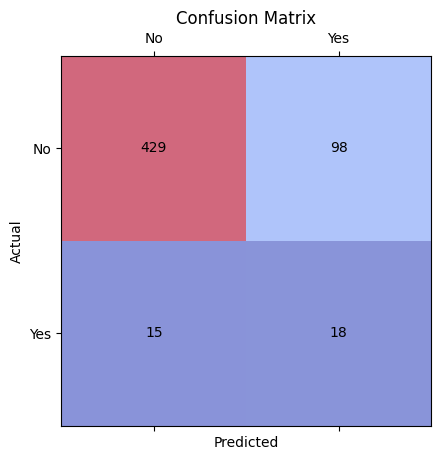

In [58]:
plot_confusion_matrix(y_test, y_pred_dt_manual)